In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pickle

In [2]:
analysis = None
for filename in os.listdir("./analysis"):
    if "analysis" in filename:
        with open("./analysis/" + filename, "rb") as file:
            if analysis == None:
                analysis = pickle.load(file)
            else:
                new_analysis = pickle.load(file)
                for k in analysis.keys():
                    analysis[k].extend(new_analysis[k])

In [4]:
print(analysis)

{'reward_history': [[], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], 

In [3]:
for r in analysis["reward_history"][-2:]: print(r[::-1])

[]
[]


In [6]:
reward_sum_history = [np.sum(step_rewards) for step_rewards in analysis["reward_history"]]
filtered_reward_sum_history = [np.sum([reward for reward in step_rewards if reward in [1, 5]]) for step_rewards in analysis["reward_history"]]

In [7]:
def array_splits_of_size(N, array):
    return np.array_split(array, len(array) // N)

In [8]:
each_weights_history = np.array(analysis["weight_history"]).T

In [9]:
N = 50

each_weights_history_mean = np.array([[np.mean(chunk) for chunk in np.array_split(this_weights_history, N)] for this_weights_history in each_weights_history])
reward_sum_history_mean = np.array([np.mean(chunk) for chunk in np.array_split(reward_sum_history, N)])
filtered_reward_sum_history_mean = np.array([np.mean(chunk) for chunk in np.array_split(filtered_reward_sum_history, N)])
loss_history_mean = np.array([np.mean(chunk) for chunk in np.array_split(analysis["loss_history"], N)])
game_length_mean = np.array([np.mean(chunk) for chunk in np.array_split(analysis["game_length"], N)])
temp_mean = np.array([np.mean(chunk) for chunk in np.array_split(analysis["temp"], N)])

each_weights_history_max = np.array([[np.max(chunk) for chunk in np.array_split(this_weights_history, N)] for this_weights_history in each_weights_history])
reward_sum_history_max = np.array([np.max(chunk) for chunk in np.array_split(reward_sum_history, N)])
filtered_reward_sum_history_max = np.array([np.max(chunk) for chunk in np.array_split(filtered_reward_sum_history, N)])
loss_history_max = np.array([np.max(chunk) for chunk in np.array_split(analysis["loss_history"], N)])
game_length_max = np.array([np.max(chunk) for chunk in np.array_split(analysis["game_length"], N)])
temp_max = np.array([np.max(chunk) for chunk in np.array_split(analysis["temp"], N)])

each_weights_history_min = np.array([[np.min(chunk) for chunk in np.array_split(this_weights_history, N)] for this_weights_history in each_weights_history])
reward_sum_history_min = np.array([np.min(chunk) for chunk in np.array_split(reward_sum_history, N)])
filtered_reward_sum_history_min = np.array([np.min(chunk) for chunk in np.array_split(filtered_reward_sum_history, N)])
loss_history_min = np.array([np.min(chunk) for chunk in np.array_split(analysis["loss_history"], N)])
game_length_min = np.array([np.min(chunk) for chunk in np.array_split(analysis["game_length"], N)])
temp_min = np.array([np.min(chunk) for chunk in np.array_split(analysis["temp"], N)])

In [10]:
len(analysis["game_length"])

101

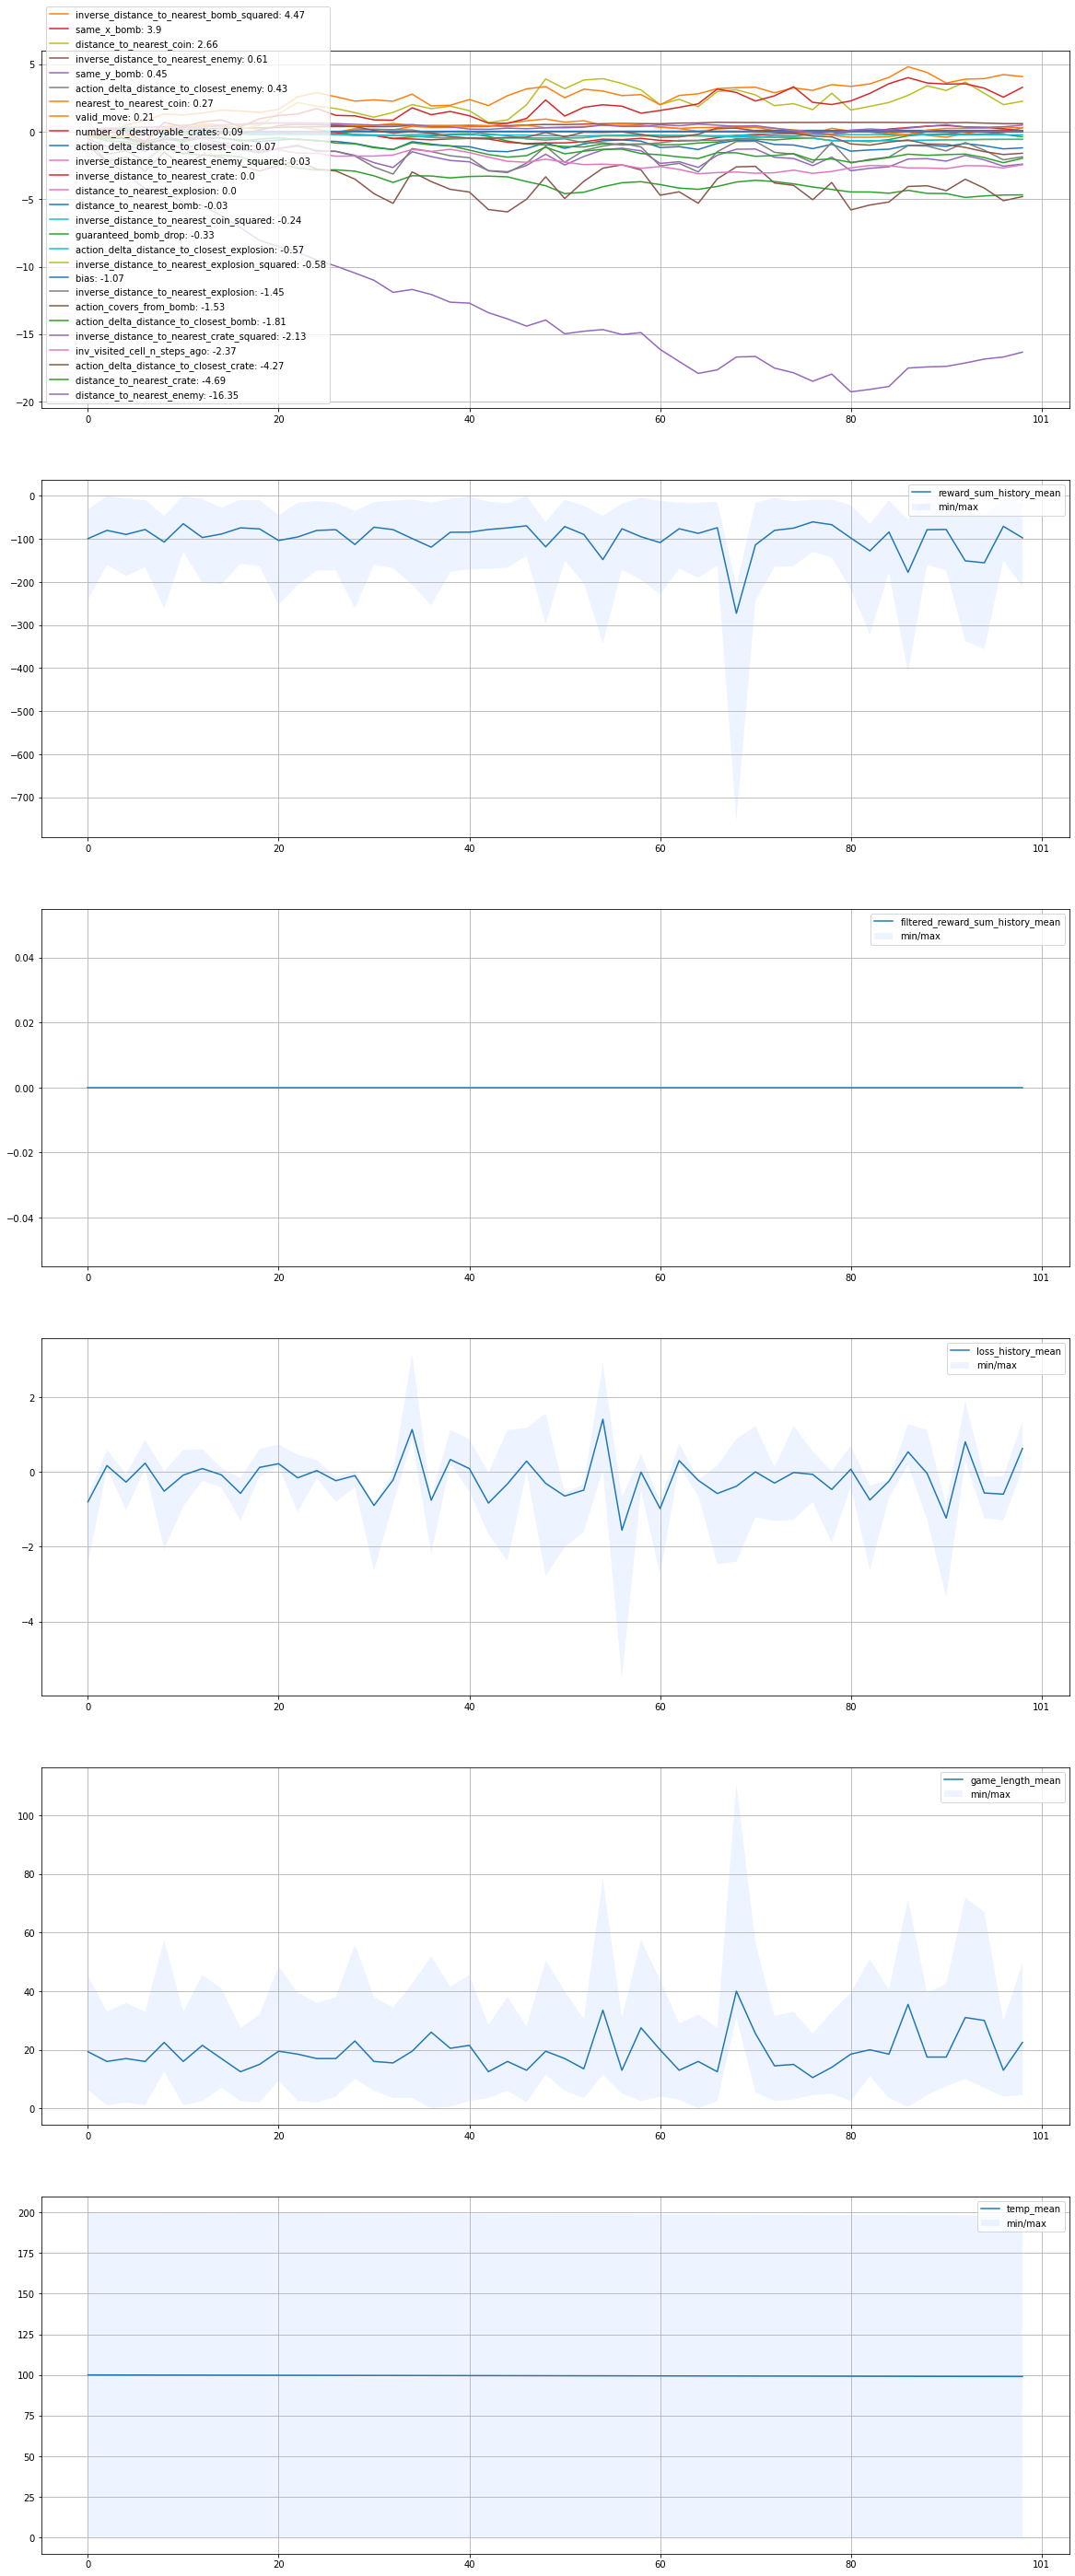

In [11]:
fig,ax = plt.subplots(6, 1, figsize=(30, 75))

for i, (name, this_weights_history) in enumerate(zip(weight_names, each_weights_history_mean)):
    ax[0].plot(np.arange(len(this_weights_history)), this_weights_history, label=f"{weight_names[i]}: {np.round(analysis['weight_history'][-1][i], 2)}")

ax[1].plot(np.arange(len(reward_sum_history_mean)), reward_sum_history_mean, label="reward_sum_history_mean")
ax[2].plot(np.arange(len(filtered_reward_sum_history_mean)), filtered_reward_sum_history_mean, label="filtered_reward_sum_history_mean")
ax[3].plot(np.arange(len(loss_history_mean)), loss_history_mean, label="loss_history_mean")
ax[4].plot(np.arange(len(game_length_mean)), game_length_mean, label="game_length_mean")
ax[5].plot(np.arange(len(temp_mean)), temp_mean, label="temp_mean")

ax[1].fill_between(np.arange(len(reward_sum_history_mean)), reward_sum_history_mean - np.abs(reward_sum_history_min), reward_sum_history_mean + np.abs(reward_sum_history_max), facecolor="#bbd2ff", alpha=0.25, edgecolor='none', label="min/max")
ax[2].fill_between(np.arange(len(filtered_reward_sum_history_mean)), filtered_reward_sum_history_mean - filtered_reward_sum_history_min, filtered_reward_sum_history_mean + filtered_reward_sum_history_max, facecolor="#bbd2ff", alpha=0.25, edgecolor='none', label="min/max")
ax[3].fill_between(np.arange(len(loss_history_mean)), loss_history_mean - np.abs(loss_history_min), loss_history_mean + np.abs(loss_history_max), facecolor="#bbd2ff", alpha=0.25, edgecolor='none', label="min/max")
ax[4].fill_between(np.arange(len(game_length_mean)), game_length_mean - game_length_min, game_length_mean + game_length_max, facecolor="#bbd2ff", alpha=0.25, edgecolor='none', label="min/max")
ax[5].fill_between(np.arange(len(temp_mean)), temp_mean - temp_min, temp_mean + temp_max, facecolor="#bbd2ff", alpha=0.25, edgecolor='none', label="min/max")

for i, axis in enumerate(ax):
    axis.grid("all")
    axis.set_xticks(np.linspace(0, 50, 6))
    axis.set_xticklabels(np.linspace(0, len(reward_sum_history), 6).astype(int))
    axis.legend()

handles, labels = ax[0].get_legend_handles_labels()
labels, handles, end_value = zip(*sorted([[labels[i], handles[i], analysis["weight_history"][-1][i]] for i in range(len(labels))], key=lambda a: -a[2]))
ax[0].legend(handles, labels, loc="lower left");